# 04.01.

∗ What are the options to deal with missing data? ( NaN )
    - deleting rows/columns
    - filling with mean/median/mode
    - k-nearest neighbor mean - KNN

∗ What are the options for non-standardized data labeling?
    - one-hot encoding (binary: 0 or 1)
    - label encoding

∗ What are the options for data of different kinds? (think str and int )
    - Check for unexpected types using df.dtypes or apply(type)
    - Split mixed-type columns into separate ones (e.g., extract numbers from strings)

∗ Why is it not okay to just “complete” the data table you may have with the
average value if there are too many missing data? (Think about statistics!)
    - the mean becomes unrepresentative of the whole dataset
    - filling a large portion of the dataset with 'mean' values introduced bias.

In [5]:
from typing import List

import math
import matplotlib . pyplot as plt
import numpy as np
import pandas as pd
import random as rnd
import seaborn as sns

sns . set_theme ( )

df = pd.read_csv('/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture04/exercises/data/penguins.csv')

print(df.shape)
df.head(10)

(342, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE
5,Adelie,Torgersen,38.9,17.8,181,3625,FEMALE
6,Adelie,Torgersen,39.2,19.6,195,4675,MALE
7,Adelie,Torgersen,34.1,18.1,193,3475,NaN
8,Adelie,Torgersen,42.0,20.2,190,4250,NaN
9,Adelie,Torgersen,37.8,17.1,186,3300,NaN


In [6]:
df.species

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
337    Gentoo
338    Gentoo
339    Gentoo
340    Gentoo
341    Gentoo
Name: species, Length: 342, dtype: object

In [19]:
df_gentoo = df[df.species=="Gentoo"]
print(df_gentoo.shape)
df_gentoo

(123, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
219,Gentoo,Biscoe,46.1,13.2,211,4500,FEMALE
220,Gentoo,Biscoe,50.0,16.3,230,5700,MALE
221,Gentoo,Biscoe,48.7,14.1,210,4450,FEMALE
222,Gentoo,Biscoe,50.0,15.2,218,5700,MALE
223,Gentoo,Biscoe,47.6,14.5,215,5400,MALE
...,...,...,...,...,...,...,...
337,Gentoo,Biscoe,47.2,13.7,214,4925,FEMALE
338,Gentoo,Biscoe,46.8,14.3,215,4850,FEMALE
339,Gentoo,Biscoe,50.4,15.7,222,5750,MALE
340,Gentoo,Biscoe,45.2,14.8,212,5200,FEMALE


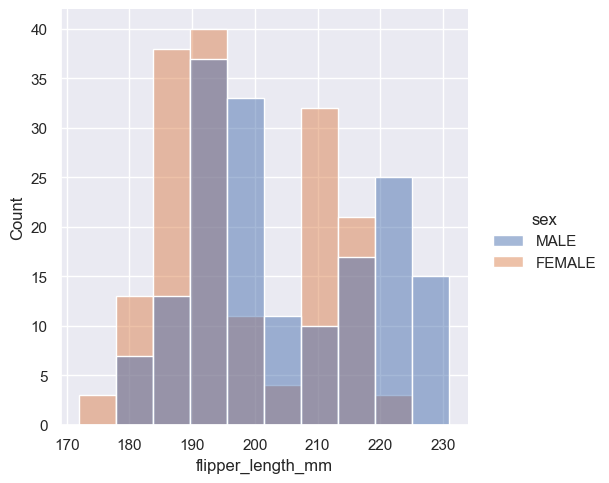

In [ ]:
sns.displot(df, x='flipper_length_mm', hue='species')

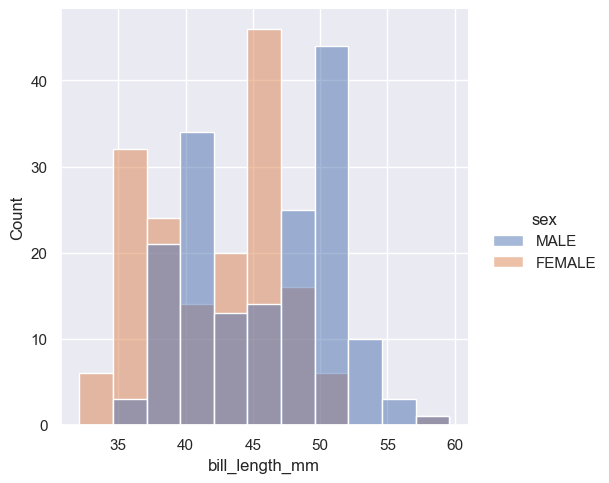

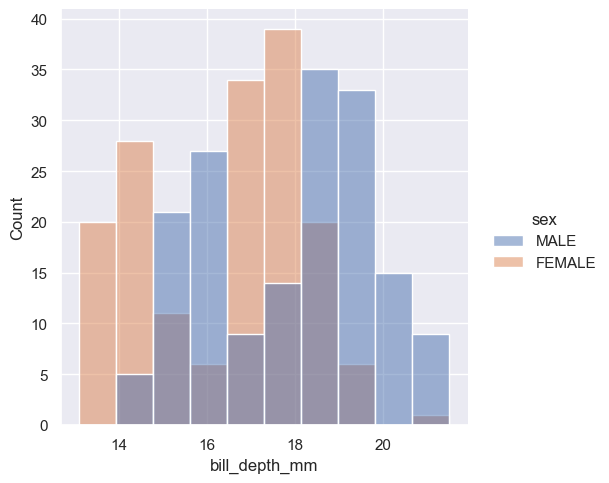

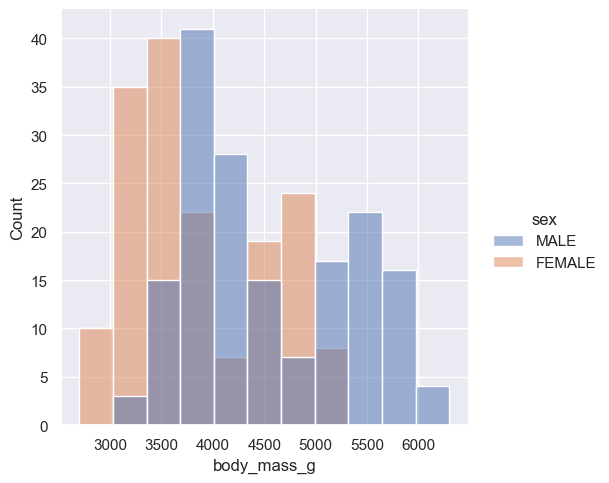

In [ ]:
sns.displot(df, x='bill_length_mm', hue='species')
sns.displot(df, x='bill_depth_mm', hue='species')
sns.displot(df, x='body_mass_g', hue='species')

In [64]:
df2 = pd.read_csv('/Users/johannes/Library/CloudStorage/OneDrive-Personal/12_UNIVERSITY/2_ITU/30_SEMESTER_3/32_DataMining/3_CODING/damin2025/lecture04/exercises/data/penguins2.csv')

df2.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie.,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,NaN,Female
3,NaN,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie.,Torgersen,NaN,19.3,193.0,3450.0,Female
5,Adelie.,Torgersen,39.3,20.6,190.0,3650.0,Male
6,adelie,NaN,38.9,17.8,181.0,3625.0,Female
7,Adelie.,Torgersen,39.2,NaN,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [65]:
print(f'dataset has {len(df2)} observations.')
print(f'Adelie: {df2.species[df2.species == 'Adelie'].size}x')
print(f'Gentoo: {df2.species[df2.species == 'Gentoo'].size}x')
print(f'Chinstrap: {df2.species[df2.species == 'Chinstrap'].size}x')

print(f'# of NaN: {df2.species.isna().sum()} out of {len(df2)}')

dataset has 344 observations.
Adelie: 43x
Gentoo: 36x
Chinstrap: 19x
# of NaN: 34 out of 344


In [66]:
df2["species"].unique()

array(['Adelie.', 'Adelie', nan, 'adelie', 'chintrap', 'Chinstrap',
       'chinstrap', 'Gentoo', 'gento', 'gentoo'], dtype=object)

In [67]:
df2.loc[df2.species.isin(['adelie.', 'Adelie.', 'adelie']), 'species'] = 'Adelie'
df2.loc[df2.species.isin(['chintrap', 'chinstrap']), 'species'] = 'Chinstrap'
df2.loc[df2.species.isin(['gento', 'gentoo']), 'species'] = 'Gentoo'

In [68]:
df2["species"].unique()

array(['Adelie', nan, 'Chinstrap', 'Gentoo'], dtype=object)

In [69]:
print(df2.shape)
df2.head(10)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,NaN,Female
3,NaN,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,NaN,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,NaN,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,NaN,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
df2_cleaned = df2.copy()
df2_cleaned = df2.drop_duplicates()
df2_cleaned = df2_cleaned.dropna(subset=['species', 'island', 'sex'])

In [72]:
print(df2_cleaned.shape)
df2_cleaned.head(10)

(236, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,NaN,Female
4,Adelie,Torgersen,NaN,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,NaN,195.0,4675.0,Male
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,Female
17,Adelie,Torgersen,42.5,20.7,197.0,4500.0,Male
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
19,Adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


# IMPUTATION option 1
# mean

In [ ]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
df2_cleaned_mean = df2_cleaned.copy()
df2_cleaned_mean.iloc[:, 2:6] = mean_imputer.fit_transform(
    df2_cleaned_mean[['bill_length_mm', 'bill_depth_mm',
                'flipper_length_mm', 'body_mass_g']]
)

print(df2_cleaned_mean.shape)
df2_cleaned_mean.head(10)

(271, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.0,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.0,4219.166667,Female
4,Adelie,Torgersen,43.817917,19.300000,193.0,3450.000000,Female
5,Adelie,Torgersen,39.300000,20.600000,190.0,3650.000000,Male
7,Adelie,Torgersen,39.200000,17.201992,195.0,4675.000000,Male
8,Adelie,Torgersen,34.100000,18.100000,193.0,3475.000000,NaN
9,Adelie,Torgersen,42.000000,20.200000,190.0,4250.000000,NaN
11,Adelie,Torgersen,37.800000,17.300000,180.0,3700.000000,NaN
14,Adelie,Torgersen,34.600000,21.100000,198.0,4400.000000,NaN


# IMPUTATION option 2
# knn

In [150]:
df2_cleaned.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,NaN,Female
4,Adelie,Torgersen,NaN,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,NaN,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,NaN


In [151]:
from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=2)
df2_cleaned_knn = df2_cleaned.copy()
df2_cleaned_knn.iloc[:, 2:6] = knn_imputer.fit_transform(
    df2_cleaned_knn.iloc[:, 2:6]
)

print(df2_cleaned_knn.shape)
df2_cleaned_knn.head(10)

(271, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.70,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.40,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.00,195.0,3550.0,Female
4,Adelie,Torgersen,37.3,19.30,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.60,190.0,3650.0,Male
7,Adelie,Torgersen,39.2,19.95,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.10,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.20,190.0,4250.0,NaN
11,Adelie,Torgersen,37.8,17.30,180.0,3700.0,NaN
14,Adelie,Torgersen,34.6,21.10,198.0,4400.0,NaN


# IMPUTATION option 3
# Calculate the average PER species

In [61]:
# for comparison:
print(df2_cleaned.shape)
df2_cleaned.head(10)

(236, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie.,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,NaN,Female
4,Adelie.,Torgersen,NaN,19.3,193.0,3450.0,Female
5,Adelie.,Torgersen,39.3,20.6,190.0,3650.0,Male
7,Adelie.,Torgersen,39.2,NaN,195.0,4675.0,Male
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,Female
17,Adelie.,Torgersen,42.5,20.7,197.0,4500.0,Male
18,adelie,Torgersen,34.4,18.4,184.0,3325.0,Female
19,adelie,Torgersen,46.0,21.5,194.0,4200.0,Male


In [73]:
df2_cleaned_meanPerSpecies = df2_cleaned.copy()

# Columns to fill
cols_to_impute = df2_cleaned_meanPerSpecies.columns[2:6]
cols_to_impute

Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'], dtype='object')

In [74]:
# Fill NaNs with species-specific means

for col in cols_to_impute:
    df2_cleaned_meanPerSpecies[col] = df2_cleaned_meanPerSpecies[col].fillna(
        df2_cleaned_meanPerSpecies.groupby('species')[col].transform('mean')
    )

print(df2_cleaned_meanPerSpecies.shape)
df2_cleaned_meanPerSpecies.head(10)

(236, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.0,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.0,3692.447917,Female
4,Adelie,Torgersen,38.736735,19.300000,193.0,3450.000000,Female
5,Adelie,Torgersen,39.300000,20.600000,190.0,3650.000000,Male
7,Adelie,Torgersen,39.200000,18.289109,195.0,4675.000000,Male
15,Adelie,Torgersen,36.600000,17.800000,185.0,3700.000000,Female
17,Adelie,Torgersen,42.500000,20.700000,197.0,4500.000000,Male
18,Adelie,Torgersen,34.400000,18.400000,184.0,3325.000000,Female
19,Adelie,Torgersen,46.000000,21.500000,194.0,4200.000000,Male


In [75]:
males = df2_cleaned_meanPerSpecies[df2_cleaned_meanPerSpecies['sex'] == 'Male']['sex'].size
females = df2_cleaned_meanPerSpecies[df2_cleaned_meanPerSpecies['sex'] == 'Female']['sex'].size
nans = df2_cleaned_meanPerSpecies[df2_cleaned_meanPerSpecies['sex'].isna()]['sex'].size
total = df2_cleaned_meanPerSpecies['sex'].size
print(f'Males: {males}, \nFemales: {females}, \nNaN: {nans}, \nTotal: {total}')

Males: 118, 
Females: 118, 
NaN: 0, 
Total: 236


In [ ]:
# my failed test

df2_cleaned_meanPerSpecies = df2_cleaned.copy()
specs = df2_cleaned_meanPerSpecies.species.unique()

spec_mean = {}

for spec in specs:
    spec_rows = df2_cleaned_meanPerSpecies[df2_cleaned_meanPerSpecies.species == spec]
    mean = spec_rows.iloc[:, 2:6].dropna().mean()
    spec_mean[spec] = mean
    # print(spec)
    # print(mean)

print(spec_mean)

{'Adelie': bill_length_mm         38.558025
bill_depth_mm          18.391358
flipper_length_mm     190.345679
body_mass_g          3722.839506
dtype: float64, 'Chinstrap': bill_length_mm         48.771429
bill_depth_mm          18.305714
flipper_length_mm     196.057143
body_mass_g          3697.142857
dtype: float64, 'Gentoo': bill_length_mm         47.538095
bill_depth_mm          15.152381
flipper_length_mm     217.571429
body_mass_g          5136.507937
dtype: float64}


# Check for NaNs

In [76]:
df2_final = df2_cleaned_meanPerSpecies
print(df2_final.iloc[:,:].isna().sum())  # Should show 0 for each column
df2_final.head(10)


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.100000,18.700000,181.0,3750.000000,Male
1,Adelie,Torgersen,39.500000,17.400000,186.0,3800.000000,Female
2,Adelie,Torgersen,40.300000,18.000000,195.0,3692.447917,Female
4,Adelie,Torgersen,38.736735,19.300000,193.0,3450.000000,Female
5,Adelie,Torgersen,39.300000,20.600000,190.0,3650.000000,Male
7,Adelie,Torgersen,39.200000,18.289109,195.0,4675.000000,Male
15,Adelie,Torgersen,36.600000,17.800000,185.0,3700.000000,Female
17,Adelie,Torgersen,42.500000,20.700000,197.0,4500.000000,Male
18,Adelie,Torgersen,34.400000,18.400000,184.0,3325.000000,Female
19,Adelie,Torgersen,46.000000,21.500000,194.0,4200.000000,Male


# Adjust Columns' Data Types

In [79]:
print(df.dtypes)
print('\n\nSHOULD BE:\n')
print(df2_final.dtypes)

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object


SHOULD BE:

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm      int64
body_mass_g            int64
sex                   object
dtype: object


In [78]:
int_cols = ['flipper_length_mm', 'body_mass_g']
float_cols = ['bill_length_mm', 'bill_depth_mm']

for col in int_cols:
    df2_final[col] = df2_final[col].astype(np.int64)
for col in float_cols:
    df2_final[col] = df2_final[col].astype(np.float64)


# Task 4 - Comparison Plot


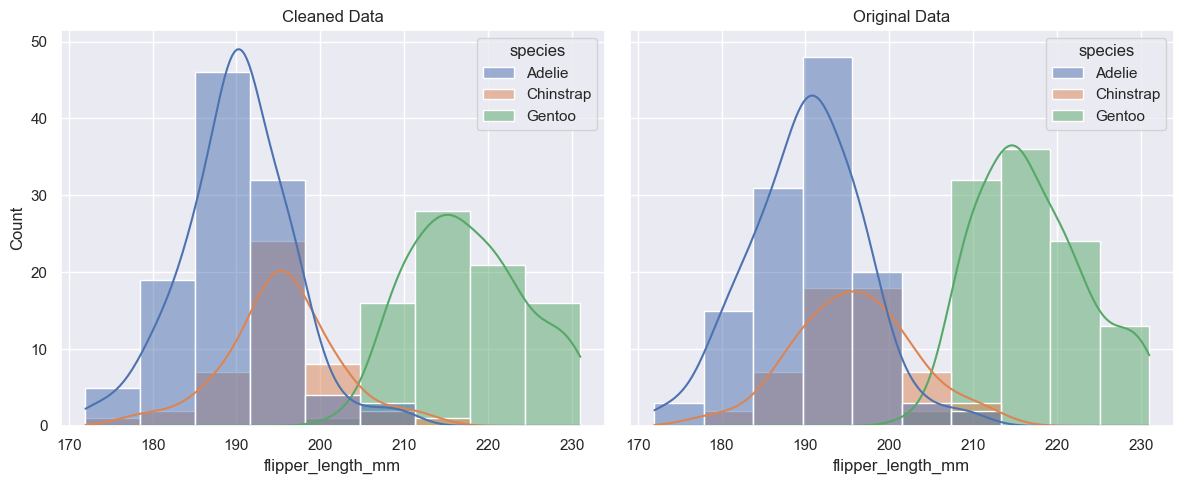

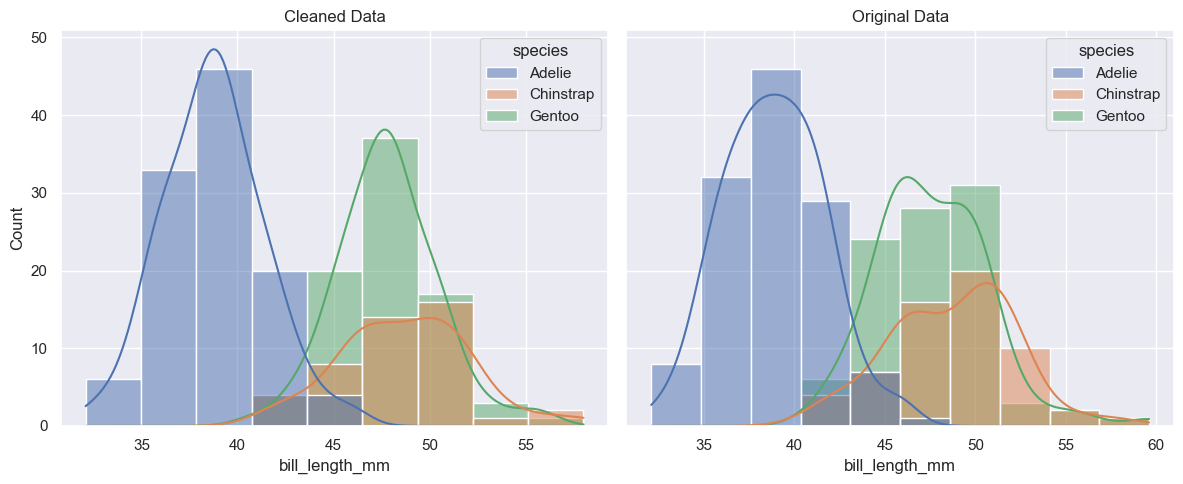

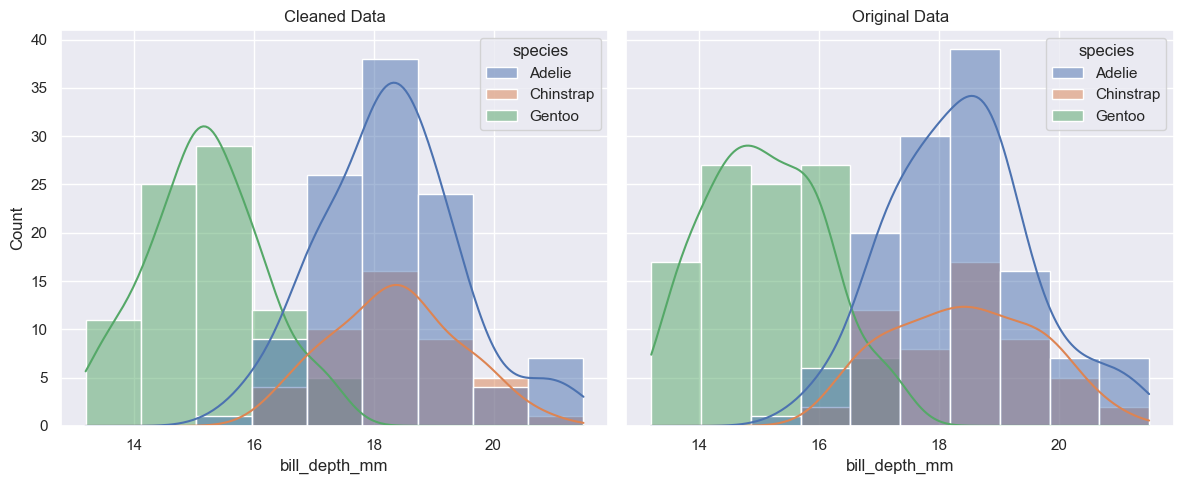

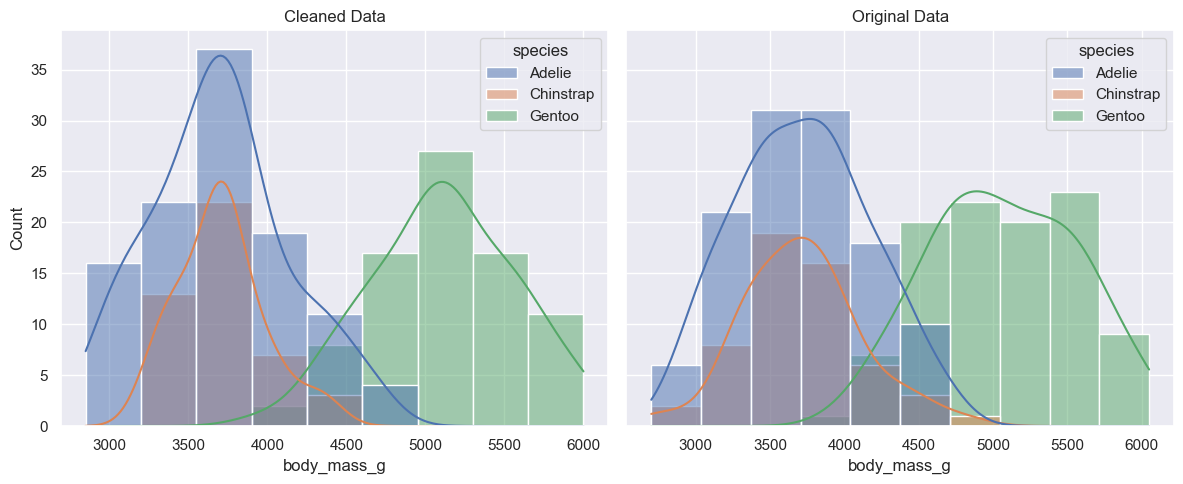

In [88]:
# flipper length

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df2_final, x='flipper_length_mm', hue='species', ax=axes[0], kde=True)
axes[0].set_title('Cleaned Data')

sns.histplot(df2, x='flipper_length_mm', hue='species', ax=axes[1], kde=True)
axes[1].set_title('Original Data')

plt.tight_layout()
plt.show()


# bill length

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df2_final, x='bill_length_mm', hue='species', ax=axes[0], kde=True)
axes[0].set_title('Cleaned Data')

sns.histplot(df2, x='bill_length_mm', hue='species', ax=axes[1], kde=True)
axes[1].set_title('Original Data')

plt.tight_layout()
plt.show()


# bill depth

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df2_final, x='bill_depth_mm', hue='species', ax=axes[0], kde=True)
axes[0].set_title('Cleaned Data')

sns.histplot(df2, x='bill_depth_mm', hue='species', ax=axes[1], kde=True)
axes[1].set_title('Original Data')

plt.tight_layout()
plt.show()


# body mass

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

sns.histplot(df2_final, x='body_mass_g', hue='species', ax=axes[0], kde=True)
axes[0].set_title('Cleaned Data')

sns.histplot(df2, x='body_mass_g', hue='species', ax=axes[1], kde=True)
axes[1].set_title('Original Data')

plt.tight_layout()
plt.show()


# sns.displot(df2_final, x='flipper_length_mm', hue='species')
# sns.displot(df2_final, x='bill_length_mm', hue='species')
# sns.displot(df2_final, x='bill_depth_mm', hue='species')
# sns.displot(df2_final, x='body_mass_g', hue='species')
